In [72]:
import sys
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import zipfile
import io
import re
import IPython.display as ipd

In [52]:
data = []
labels = []
root = "audio_data/training_data"

In [87]:
for cd, subdirs, files in os.walk(root, topdown=False):
    hl, kl, tl = re.split("[\\\\/]", cd)[-3:]
    if (kl == "bass_drum-hi_hat" and tl=="normal-open"):
        for name in files[0:10]:
            data.append(np.loadtxt(os.path.join(cd, name)))
            labels.append({"hit-label": hl, "kit-labels": kl, "tech-labels": tl})
        break
labels

[{'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'high_tom', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'high_tom', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'high_tom', 'tech-labels': 'no

ValueError: The len(window) must be the same as the shape of x for the chosen axis

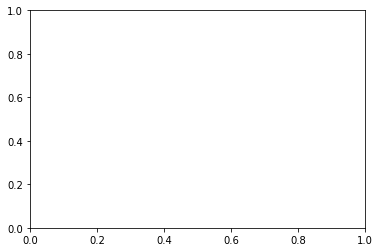

In [147]:
window_len = 8192
overlap = 128
spectrograms_a, spectrograms_b = [], []
for d in data:
    window_f = signal.get_window("hanning", Nx=window_len)
    output_a = signal.spectrogram(d, fs=48000, window=window_f, noverlap=overlap)
    spectrograms_a.append(output_a)
    Sxx, f, t, im = plt.specgram(x=d, Fs=48000, window=window_f, noverlap=overlap)
    spectrograms_b.append((f, t, Sxx))

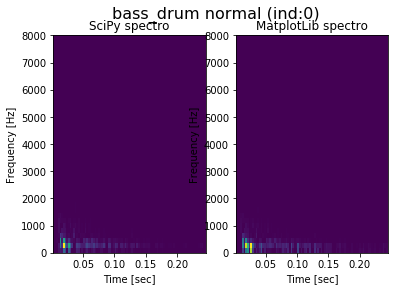

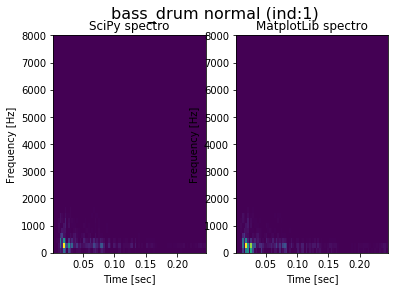

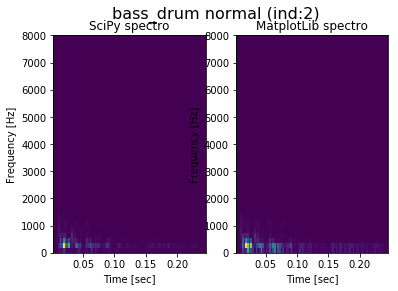

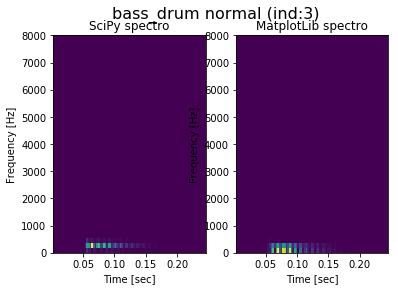

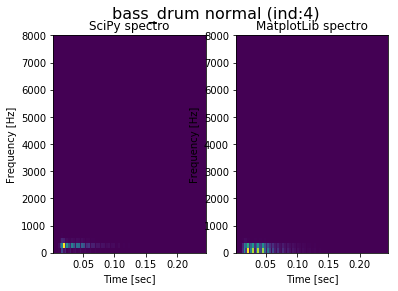

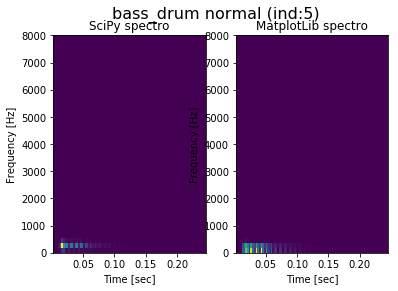

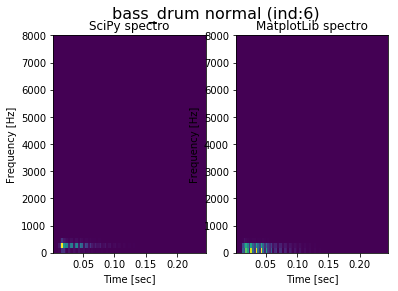

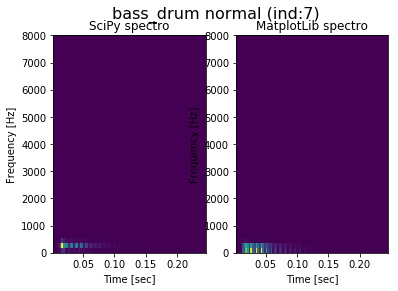

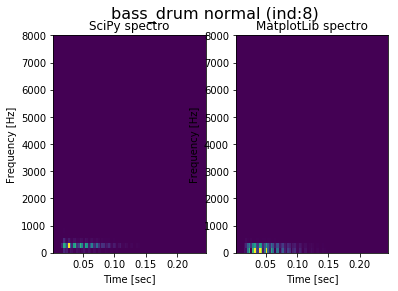

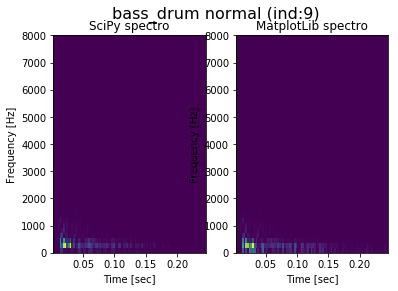

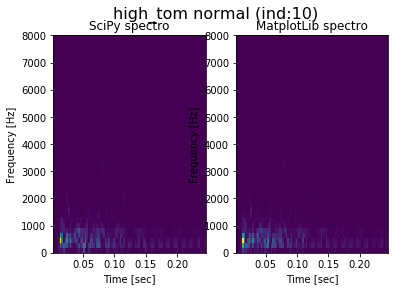

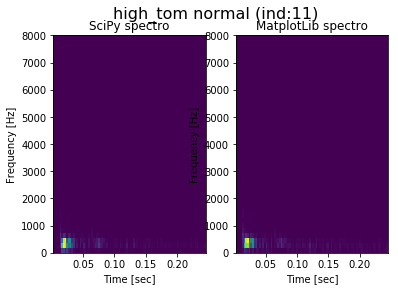

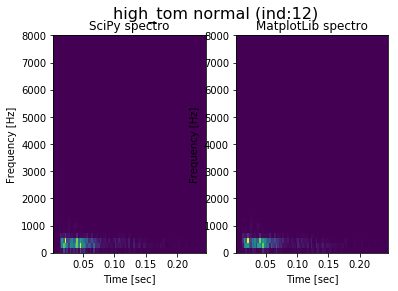

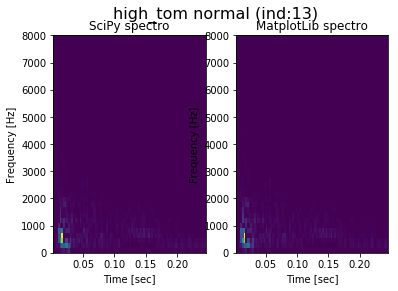

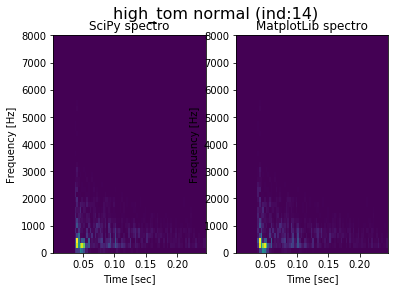

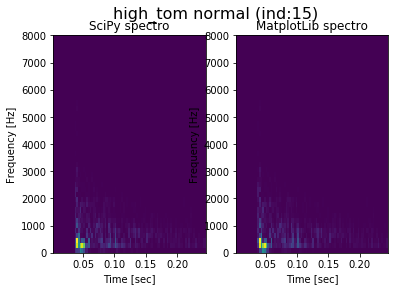

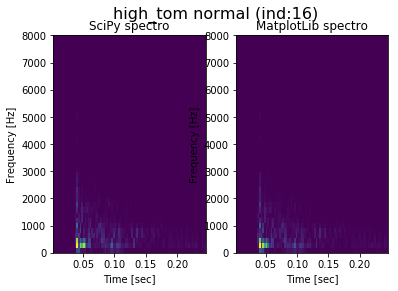

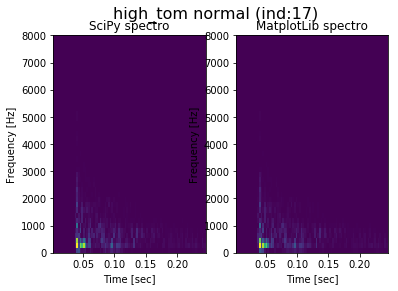

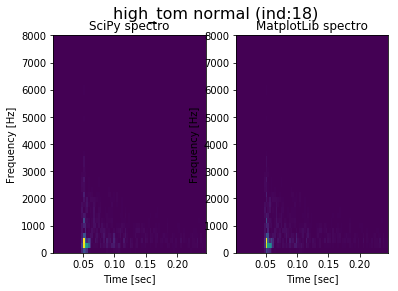

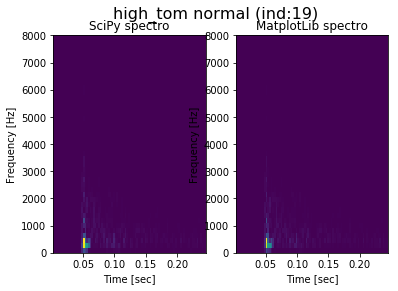

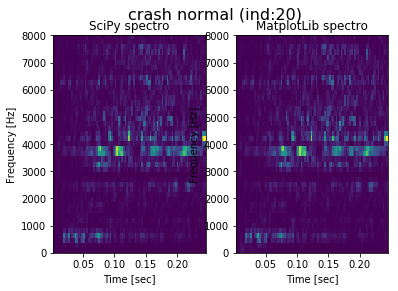

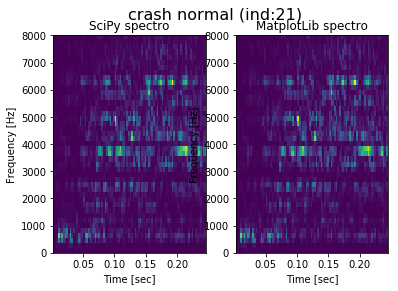

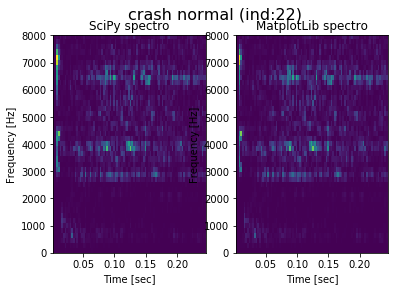

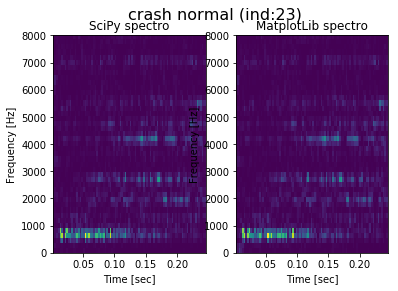

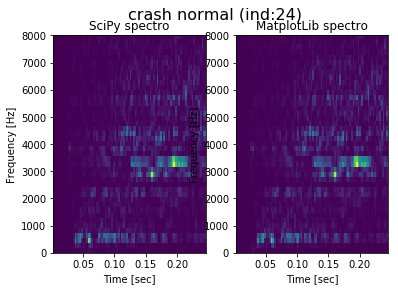

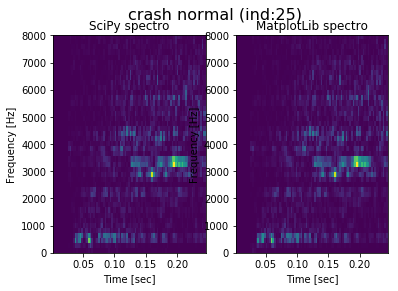

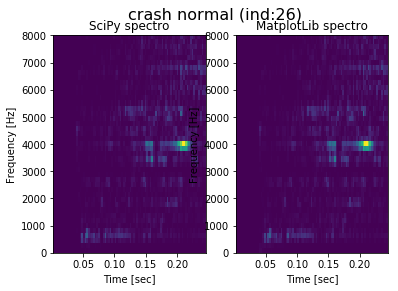

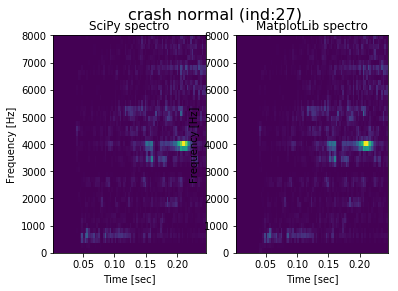

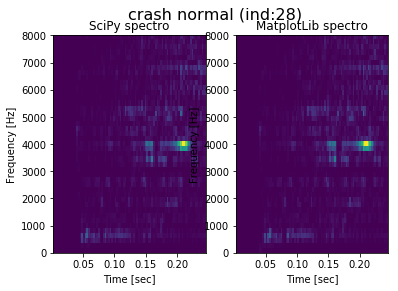

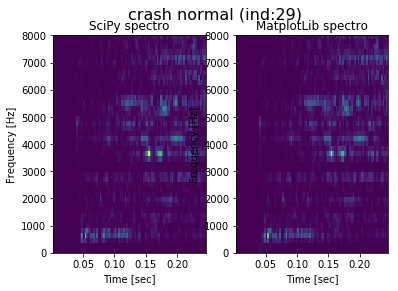

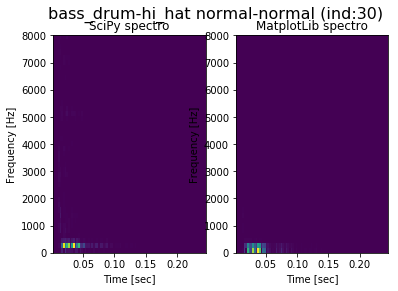

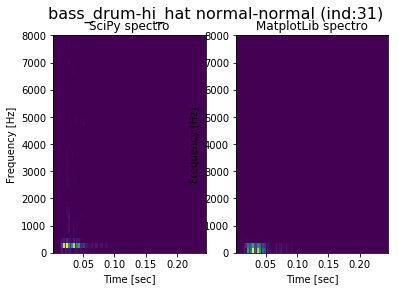

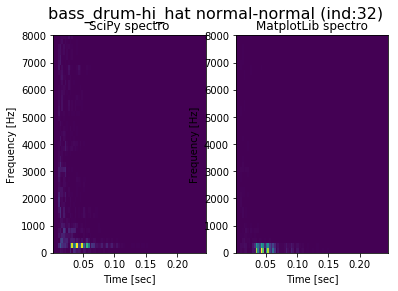

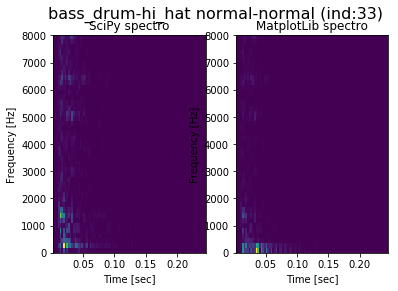

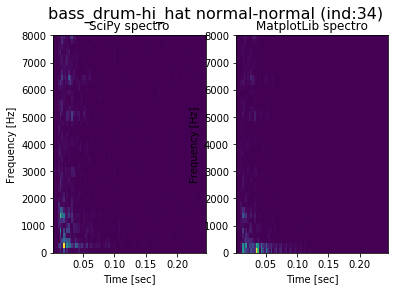

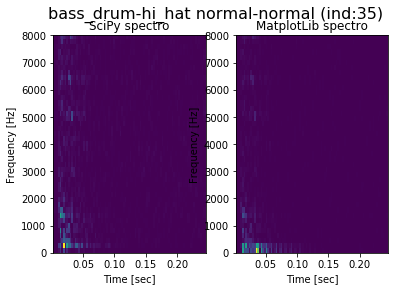

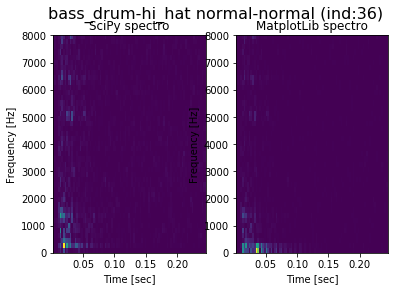

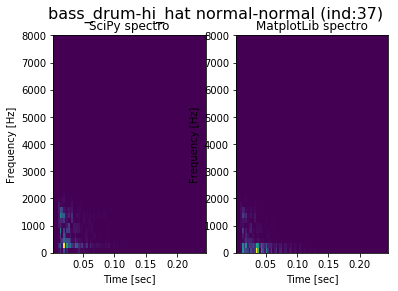

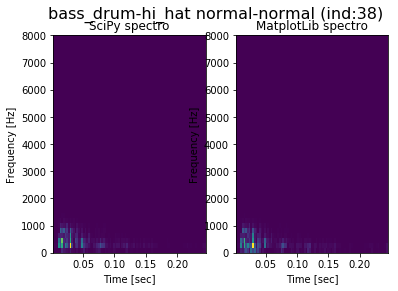

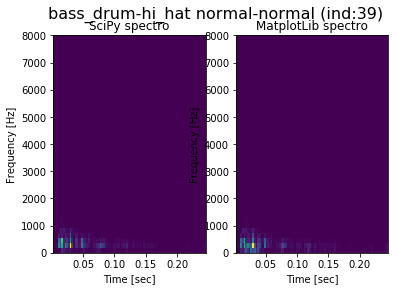

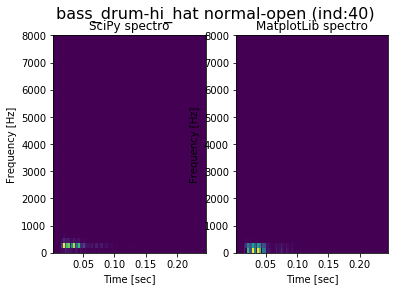

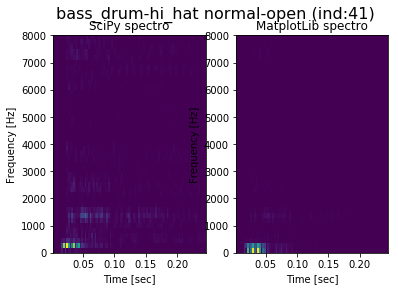

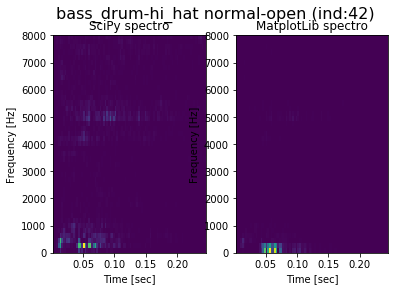

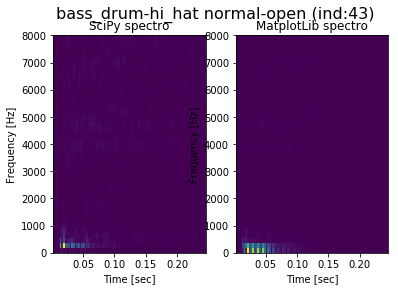

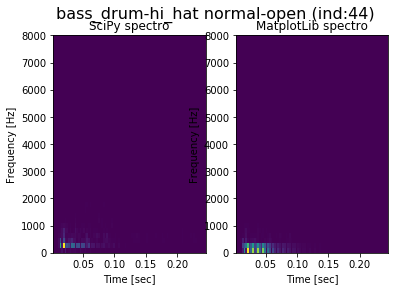

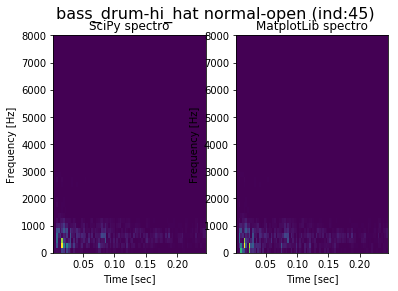

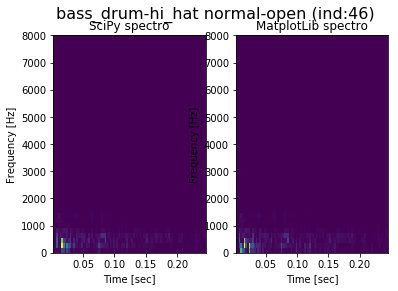

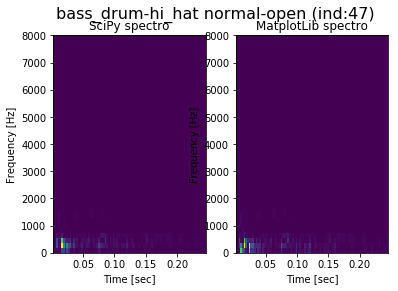

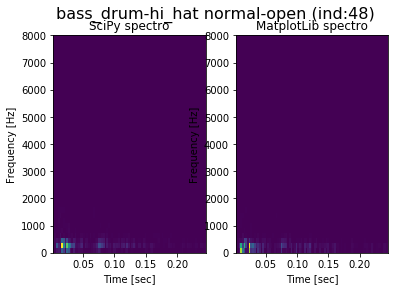

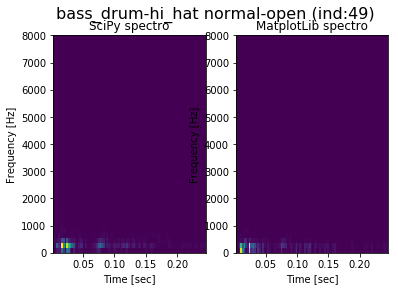

In [138]:
for i in range(len(spectrograms_a)):
    f1, t1, Sxx1 = spectrograms_a[i]
    f2, t2, Sxx2 = spectrograms_b[i]
    label = labels[i]
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.pcolormesh(t1, f1, Sxx1, alpha=1)
    ax1.set_ylabel('Frequency [Hz]')
    ax1.set_ylim((0, 8000))
    ax1.set_xlabel('Time [sec]')
    ax1.set_title("SciPy spectro")
    ax2.pcolormesh(t2, f2, Sxx2, alpha=1)
    ax2.set_ylabel('Frequency [Hz]')
    ax2.set_ylim((0, 8000))
    ax2.set_xlabel('Time [sec]')
    ax2.set_title("MatplotLib spectro")
    fig.suptitle('{} {} (ind:{})'.format(label["kit-labels"], label["tech-labels"], i), fontsize=16)
    plt.show()

In [97]:
ipd.Audio(data=data[49], rate=48000)

In [139]:
spectrograms_a[20][2].shape

(129, 92)

In [120]:
np.amax(spectrograms_a[20][2])

1.0629765287467935e-08